In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
enfile1 = pd.read_csv("enrolments/api_data_aadhar_enrolment_0_500000.csv")
enfile2 = pd.read_csv("enrolments/api_data_aadhar_enrolment_500000_1000000.csv")
enfile3 = pd.read_csv("enrolments/api_data_aadhar_enrolment_1000000_1006029.csv")

enrolment_df = pd.concat([enfile1, enfile2, enfile3], ignore_index=True)

print(enrolment_df.shape)


(1006029, 7)


In [7]:
dmfile1 = pd.read_csv("demographic/api_data_aadhar_demographic_0_500000.csv")
dmfile2 = pd.read_csv("demographic/api_data_aadhar_demographic_1000000_1500000.csv")
dmfile3 = pd.read_csv("demographic/api_data_aadhar_demographic_1500000_2000000.csv")
dmfile4 = pd.read_csv("demographic/api_data_aadhar_demographic_2000000_2071700.csv")
dmfile5 = pd.read_csv("demographic/api_data_aadhar_demographic_500000_1000000.csv")
demographic_df = pd.concat([dmfile1, dmfile5, dmfile2,dmfile3,dmfile4], ignore_index=True)

print(demographic_df.shape)

(2071700, 6)


In [8]:
bmfile1 = pd.read_csv("biometric/api_data_aadhar_biometric_0_500000.csv")
bmfile2 = pd.read_csv("biometric/api_data_aadhar_biometric_500000_1000000.csv")
bmfile3 = pd.read_csv("biometric/api_data_aadhar_biometric_1000000_1500000.csv")
bmfile4 = pd.read_csv("biometric/api_data_aadhar_biometric_1500000_1861108.csv")

biometric_df=pd.concat([bmfile1,bmfile2,bmfile3,bmfile4], ignore_index=True)
print(biometric_df.shape)

(1861108, 6)


In [9]:
print(enrolment_df.columns)
print(demographic_df.columns)
print(biometric_df.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')


In [82]:
# Remove nulls
enrolment_df.dropna(inplace=True)
demographic_df.dropna(inplace=True)
biometric_df.dropna(inplace=True)

# Remove duplicates
enrolment_df.drop_duplicates(inplace=True)
demographic_df.drop_duplicates(inplace=True)
biometric_df.drop_duplicates(inplace=True)
"""### Data Cleaning and Preprocessing

Basic preprocessing steps were applied, including removal of missing values
and duplicate records. Date fields were standardized to enable time-based
analysis across datasets."""

'### Data Cleaning and Preprocessing\n\nBasic preprocessing steps were applied, including removal of missing values\nand duplicate records. Date fields were standardized to enable time-based\nanalysis across datasets.'

In [12]:
print(enrolment_df.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [13]:
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], dayfirst=True)
demographic_df['date'] = pd.to_datetime(demographic_df['date'], dayfirst=True)
biometric_df['date'] = pd.to_datetime(biometric_df['date'], dayfirst=True)


In [16]:
enrolment_df['year'] = enrolment_df['date'].dt.year
enrolment_df['month'] = enrolment_df['date'].dt.month

demographic_df['year'] = demographic_df['date'].dt.year
biometric_df['year'] = biometric_df['date'].dt.year


In [17]:
enrolment_df['total_enrolment'] = (
    enrolment_df['age_0_5'] +
    enrolment_df['age_5_17'] +
    enrolment_df['age_18_greater']
)


In [18]:
demographic_df['total_demo'] = (
    demographic_df['demo_age_5_17'] +
    demographic_df['demo_age_17_']
)


In [19]:
biometric_df['total_biometric'] = (
    biometric_df['bio_age_5_17'] +
    biometric_df['bio_age_17_']
)


In [20]:
state_enrol = enrolment_df.groupby('state')['total_enrolment'].sum()

state_enrol.sort_values(ascending=False).head(10)


state
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369206
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219618
Tamil Nadu         215710
Name: total_enrolment, dtype: int64

'### Enrolment Trends and Regional Distribution\n\nThis section analyses temporal patterns and regional disparities in Aadhaar\nenrolment to identify trends and access gaps across states.'

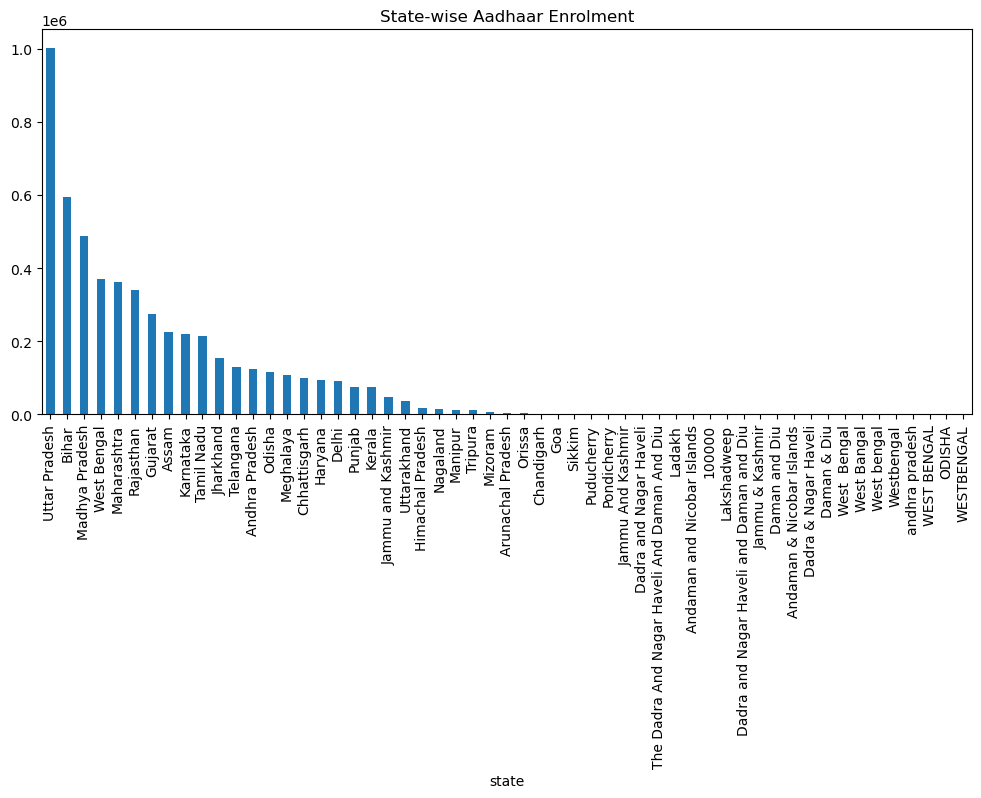

In [86]:
state_enrol.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,5),
    title="State-wise Aadhaar Enrolment"
)
"""### Enrolment Trends and Regional Distribution

This section analyses temporal patterns and regional disparities in Aadhaar
enrolment to identify trends and access gaps across states."""

<Axes: title={'center': 'Year-wise Aadhaar Enrolment Trend'}, xlabel='year'>

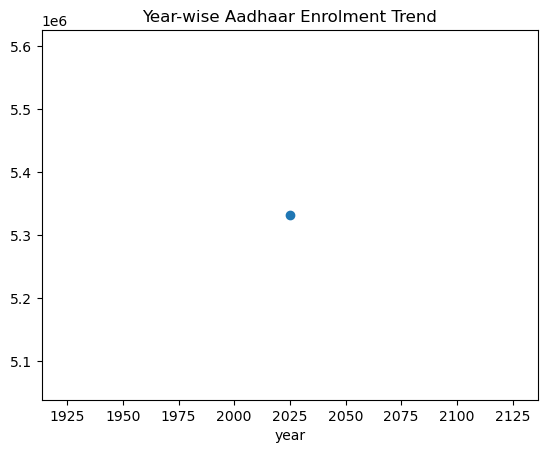

In [24]:
yearly_trend = enrolment_df.groupby('year')['total_enrolment'].sum()

yearly_trend.plot(
    kind='line',
    marker='o',
    title='Year-wise Aadhaar Enrolment Trend'
)


'### Age-wise Enrolment Behaviour\n\nAge-based enrolment patterns were examined to understand behavioural trends\nand identify population segments with lower coverage.'

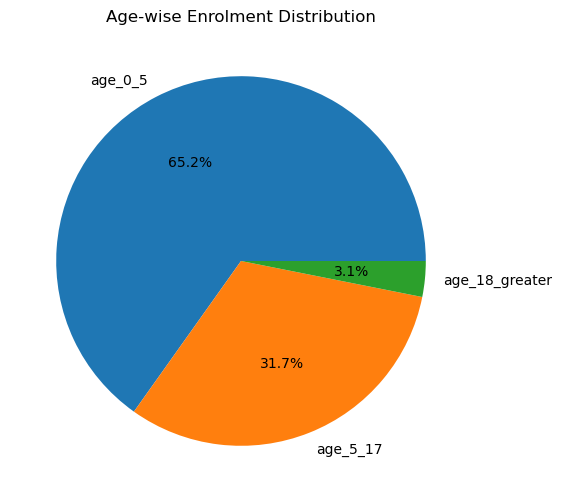

In [88]:
age_distribution = enrolment_df[
    ['age_0_5', 'age_5_17', 'age_18_greater']
].sum()

age_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Age-wise Enrolment Distribution'
)
"""### Age-wise Enrolment Behaviour

Age-based enrolment patterns were examined to understand behavioural trends
and identify population segments with lower coverage."""

'### Biometric Service Activity Analysis\n\nBiometric data was analysed to assess service workload and operational demand\nacross regions, providing insight into service delivery pressure.'

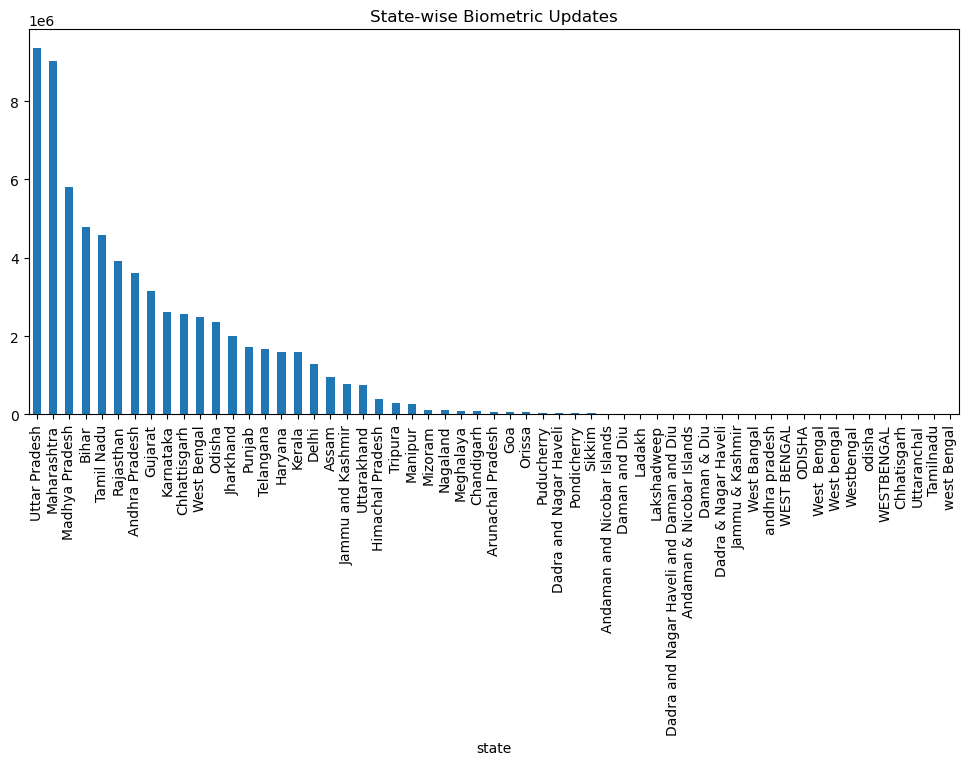

In [90]:
bio_state = biometric_df.groupby('state')['total_biometric'].sum()

bio_state.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,5),
    title="State-wise Biometric Updates"
)
"""### Biometric Service Activity Analysis

Biometric data was analysed to assess service workload and operational demand
across regions, providing insight into service delivery pressure."""

In [84]:
yearly_trend = enrolment_df.groupby('year')['total_enrolment'].sum()

mean_val = yearly_trend.mean()
std_val = yearly_trend.std()

anomalies = yearly_trend[abs(yearly_trend - mean_val) > 2 * std_val]
anomalies

"""### Feature Engineering

Aggregate indicators were created to simplify analysis:
- Total enrolment across age groups
- Total demographic population by age
- Total biometric service activity

These derived features enable consistent comparison across regions and time."""

'### Feature Engineering\n\nAggregate indicators were created to simplify analysis:\n- Total enrolment across age groups\n- Total demographic population by age\n- Total biometric service activity\n\nThese derived features enable consistent comparison across regions and time.'

In [63]:
enrolment_df.to_csv("final_enrolment.csv", index=False)
demographic_df.to_csv("final_demographic.csv", index=False)
biometric_df.to_csv("final_biometric.csv", index=False)


In [64]:
# Enrolment demand per state
enrol_state = enrolment_df.groupby('state')['total_enrolment'].sum()

# Biometric workload per state
bio_state = biometric_df.groupby('state')['total_biometric'].sum()

# Youth enrolment ratio (behavioural / inclusion signal)
youth_ratio = (
    enrolment_df.groupby('state')['age_5_17'].sum() /
    enrolment_df.groupby('state')['total_enrolment'].sum()
)

In [65]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

enrol_n = normalize(enrol_state)
bio_n = normalize(bio_state)

# Higher value = worse inclusion gap
youth_gap_n = normalize(1 - youth_ratio)

In [66]:
ssi = (enrol_n + bio_n + youth_gap_n) / 3
ssi = ssi.sort_values(ascending=False)

ssi.head(10)

state
Uttar Pradesh     0.753723
Maharashtra       0.658777
Madhya Pradesh    0.579456
Tamil Nadu        0.480147
Andhra Pradesh    0.446810
Karnataka         0.419580
Rajasthan         0.417616
West Bengal       0.416749
Bihar             0.413375
Gujarat           0.403475
dtype: float64

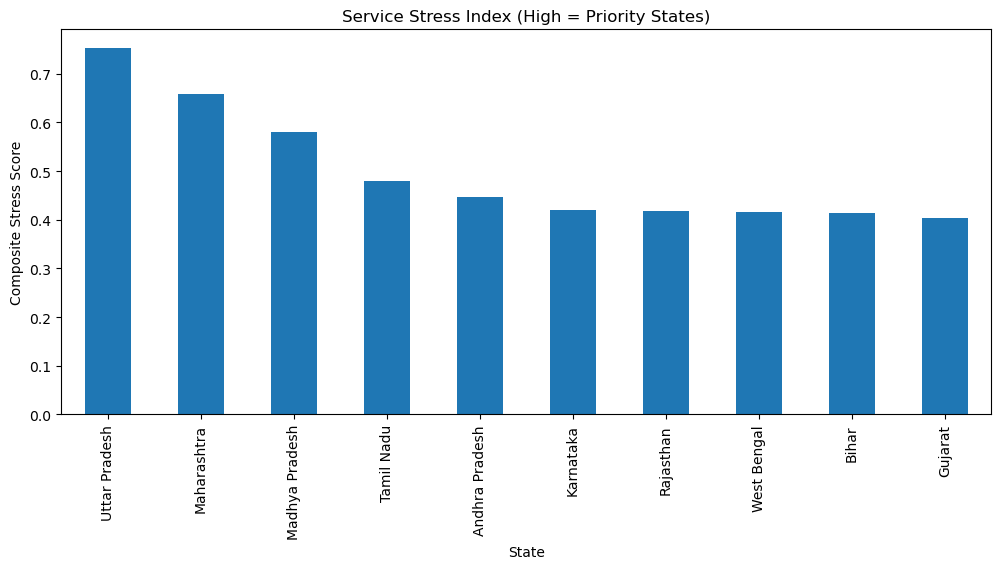

In [69]:
ssi.head(10).plot(
    kind='bar',
    figsize=(12,5),
    title="Service Stress Index (High = Priority States)"
)
plt.ylabel("Composite Stress Score")
plt.xlabel("State")
plt.show()

In [68]:
"""### Service Stress Index (SSI)

A composite Service Stress Index was constructed to identify states requiring
priority administrative attention. The index combines three normalized
indicators: (i) Aadhaar enrolment demand, (ii) biometric service workload, and
(iii) youth inclusion gap. Higher values indicate regions experiencing
simultaneous pressure on service delivery and inclusion."""

'### Service Stress Index (SSI)\n\nA composite Service Stress Index was constructed to identify states requiring\npriority administrative attention. The index combines three normalized\nindicators: (i) Aadhaar enrolment demand, (ii) biometric service workload, and\n(iii) youth inclusion gap. Higher values indicate regions experiencing\nsimultaneous pressure on service delivery and inclusion.'